### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Παπανικολάου Αριάδνη

Α.Μ.: 03120097

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

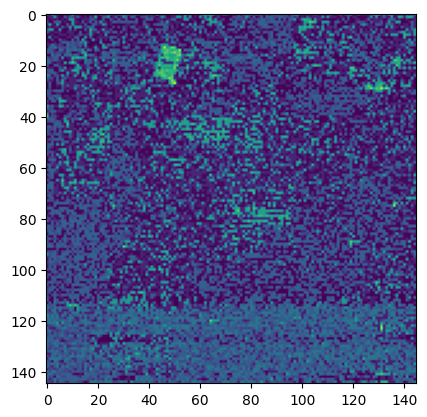

In [173]:
import numpy as np
import matplotlib.pyplot as plt

# Φόρτωση των δεδομένων από το αρχείο
image_data = np.load("indian_pines_corrected.npy")
plt.imshow(image_data[:,:,0])

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [174]:
# Φόρτωση των επισημειώσεων
labels = np.load("indian_pines_gt.npy")

# Ορισμός των κατηγοριών
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]


### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

Ύψος: 145
Πλάτος: 145
Αριθμός Υπερφασματικών Καναλιών: 200


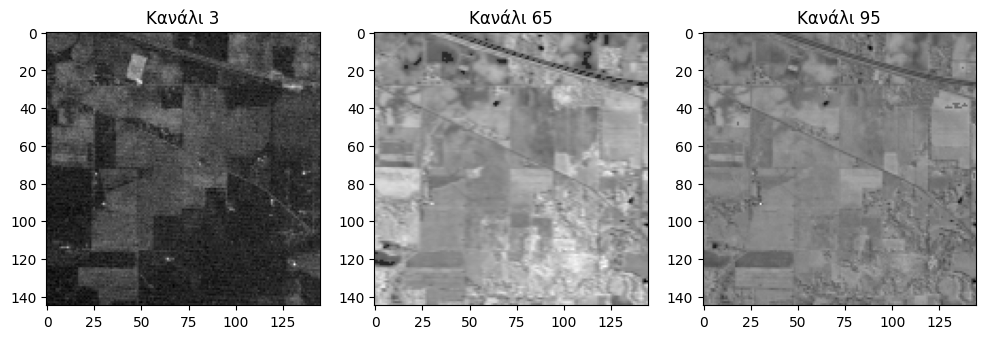

Ο αριθμός των διαφορετικών κατηγοριών είναι: 17


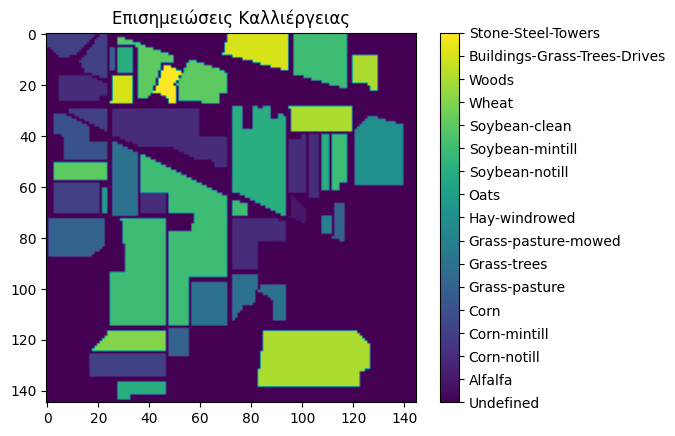

<Figure size 1000x800 with 0 Axes>

Πλήθος pixels ανά τύπο καλλιέργειας:
Undefined: 10776 pixels
Alfalfa: 46 pixels
Corn-notill: 1428 pixels
Corn-mintill: 830 pixels
Corn: 237 pixels
Grass-pasture: 483 pixels
Grass-trees: 730 pixels
Grass-pasture-mowed: 28 pixels
Hay-windrowed: 478 pixels
Oats: 20 pixels
Soybean-notill: 972 pixels
Soybean-mintill: 2455 pixels
Soybean-clean: 593 pixels
Wheat: 205 pixels
Woods: 1265 pixels
Buildings-Grass-Trees-Drives: 386 pixels
Stone-Steel-Towers: 93 pixels


In [175]:
#2a
# Υψος και Πλάτος της εικόνας
height, width = image_data.shape[:2]

# Αριθμός των υπερφασματικών καναλιών
num_channels = image_data.shape[2] if len(image_data.shape) > 2 else 1

# Εκτύπωση των αποτελεσμάτων
print("Ύψος:", height)
print("Πλάτος:", width)
print("Αριθμός Υπερφασματικών Καναλιών:", num_channels)

#2b
import matplotlib.pyplot as plt

# Επιλογή του 3ου, 65ου και 95ου καναλιού
channel_3 = image_data[:, :, 2]
channel_65 = image_data[:, :, 64]
channel_95 = image_data[:, :, 94]

# Σχεδίαση των καναλιών
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(channel_3, cmap='gray')
plt.title("Κανάλι 3")

plt.subplot(1, 3, 2)
plt.imshow(channel_65, cmap='gray')
plt.title("Κανάλι 65")

plt.subplot(1, 3, 3)
plt.imshow(channel_95, cmap='gray')
plt.title("Κανάλι 95")

plt.show()

#2c
# Υπολογισμός των μοναδικών κατηγοριών
unique_classes = np.unique(labels)

# Εκτύπωση του αριθμού των διαφορετικών κατηγοριών
num_classes = len(unique_classes)
print(f"Ο αριθμός των διαφορετικών κατηγοριών είναι: {num_classes}")

#2d
plt.imshow(labels)
plt.title("Επισημειώσεις Καλλιέργειας")
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)

plt.figure(figsize=(10, 8))


plt.show()

#2e
# Υπολογισμός των pixels ανά τύπο καλλιέργειας
pixels_per_class = {class_name: np.sum(labels == idx) for idx, class_name in enumerate(classes)}

# Εκτύπωση των αποτελεσμάτων
print("Πλήθος pixels ανά τύπο καλλιέργειας:")
for class_name, pixel_count in pixels_per_class.items():
    print(f"{class_name}: {pixel_count} pixels")

### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [176]:
# Αριθμός pixels, channels
N = height * width
K = num_channels

# Μετατροπή της υπερφασματικής εικόνας σε πίνακα N x K
new_image_data = image_data.reshape((N,K))

# Μετατροπή των επισημειώσεων σε διάνυσμα μήκους N
new_labels = labels.flatten() 

# Αφαίρεση των Undefined δεδομένων
defined_indices = np.where(new_labels != 0)[0]

reshaped_image_data = new_image_data[defined_indices]
reshaped_labels = new_labels[defined_indices]


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [177]:
import random

# Επιλογή τυχαίου pixel από κάθε κατηγορία
selected_pixels = {}

for index, name in enumerate(classes):
    if name != 'Undefined':  
        indices = np.where(reshaped_labels == index)[0]
        
        if len(indices) > 0: 
            random_index = np.random.choice(indices)
            selected_pixels[name] = random_index


3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

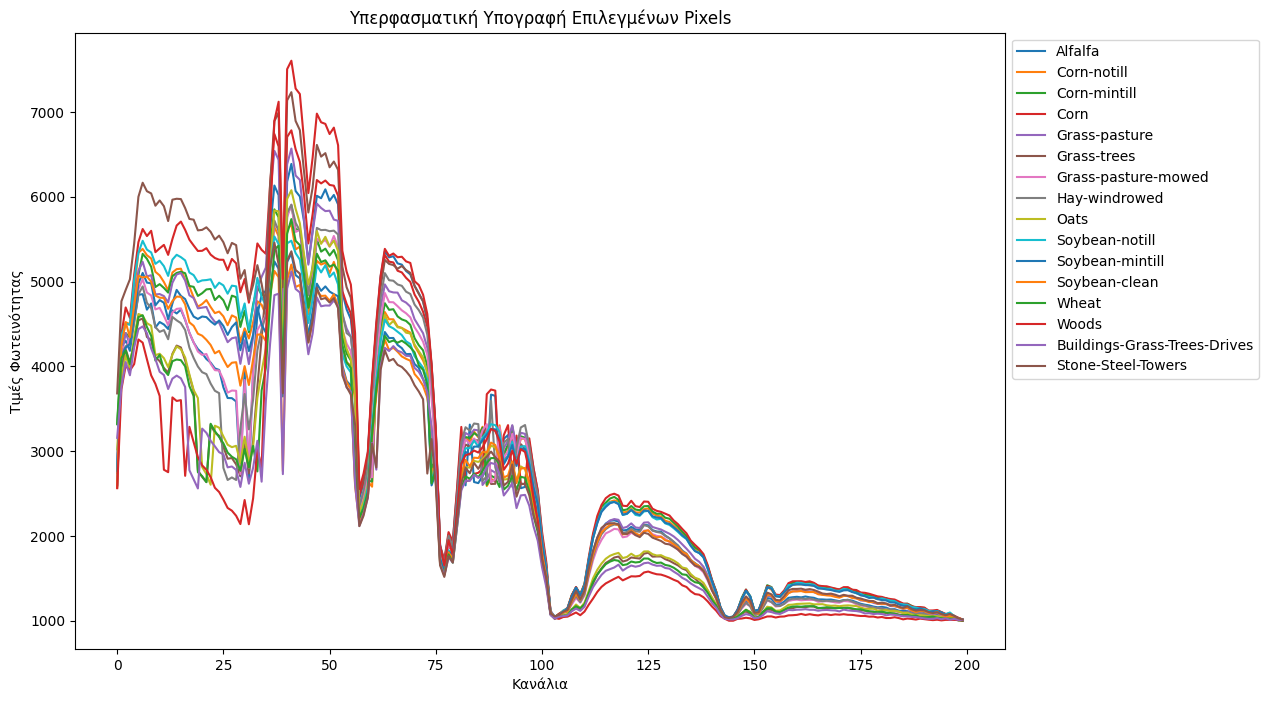

In [178]:
# Δημιουργία πλοτ
plt.figure(figsize=(12, 8))

# Εμφάνιση της υπερφασματικής υπογραφής των επιλεγμένων pixels
for name, index in selected_pixels.items():
    spectral_signature = reshaped_image_data[index]

    plt.plot(spectral_signature, label=name)

# Προσθήκη λεζάντας
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Υπερφασματική Υπογραφή Επιλεγμένων Pixels")
plt.xlabel("Κανάλια")
plt.ylabel("Τιμές Φωτεινότητας")
plt.show()


3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

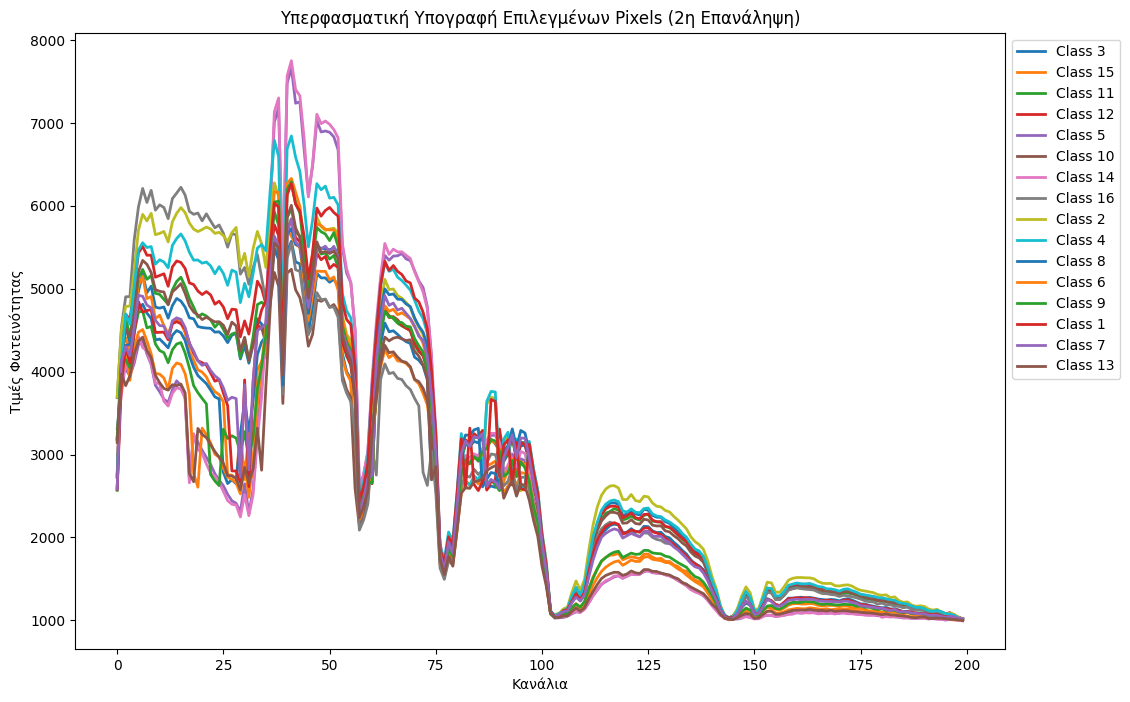

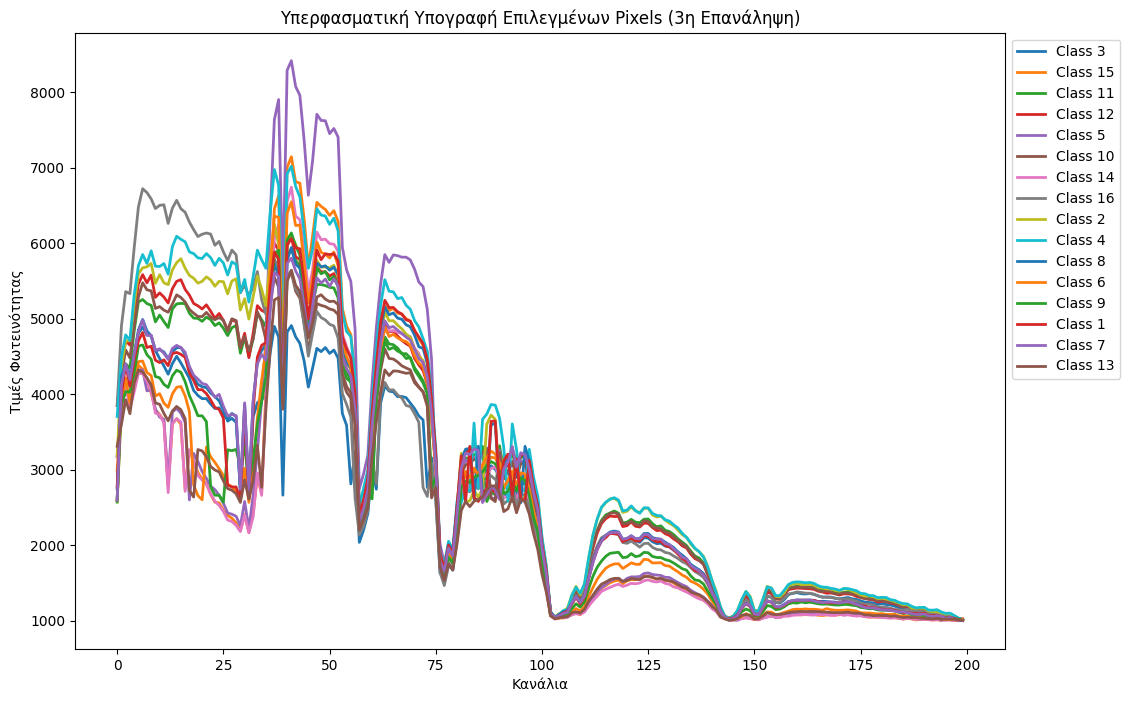

In [179]:
import random

# Δημιουργία πίνακα selected_indices
selected_indices = {label: np.where(reshaped_labels == label)[0] for label in reshaped_labels}

# Επιλογή τυχαίου pixel από κάθε κατηγορία (2η επανάληψη)
selected_pixels_2 = {}

for label, indices in selected_indices.items():
    # Έλεγχος για κενή λίστα indices
    if len(indices) > 0:
        random_index = random.choice(indices)
        selected_pixels_2[label] = reshaped_image_data[random_index, :]

# Δημιουργία πλοτ για τα νέα δεδομένα (Ερώτημα 3γ, 2η επανάληψη)
plt.figure(figsize=(12, 8))
for label, pixel in selected_pixels_2.items():
    plt.plot(pixel, label=f"Class {label}", linewidth=2)

# Προσθήκη λεζάντας
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Υπερφασματική Υπογραφή Επιλεγμένων Pixels (2η Επανάληψη)")
plt.xlabel("Κανάλια")
plt.ylabel("Τιμές Φωτεινότητας")
plt.show()

# Δημιουργία πίνακα selected_indices
selected_indices = {label: np.where(reshaped_labels == label)[0] for label in reshaped_labels}

# Επιλογή τυχαίου pixel από κάθε κατηγορία (3η επανάληψη)
selected_pixels_3 = {}

for label, indices in selected_indices.items():
    # Έλεγχος για κενή λίστα indices
    if len(indices) > 0:
        random_index = random.choice(indices)
        selected_pixels_3[label] = reshaped_image_data[random_index, :]

# Δημιουργία πλοτ για τα νέα δεδομένα (Ερώτημα 3γ, 3η επανάληψη)
plt.figure(figsize=(12, 8))
for label, pixel in selected_pixels_3.items():
    plt.plot(pixel, label=f"Class {label}", linewidth=2)

# Προσθήκη λεζάντας
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Υπερφασματική Υπογραφή Επιλεγμένων Pixels (3η Επανάληψη)")
plt.xlabel("Κανάλια")
plt.ylabel("Τιμές Φωτεινότητας")
plt.show()



3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

In [180]:
#τα διαγράμματα που έχουν παρόμοια μορφή δείχνουν ότι οι αντίστοιχες καλλιέργειές τους έχουν μεγάλη συσχέτιση
#και δεν παρέχουν σημαντικές πληροφορίες για τον διαχωρισμό

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

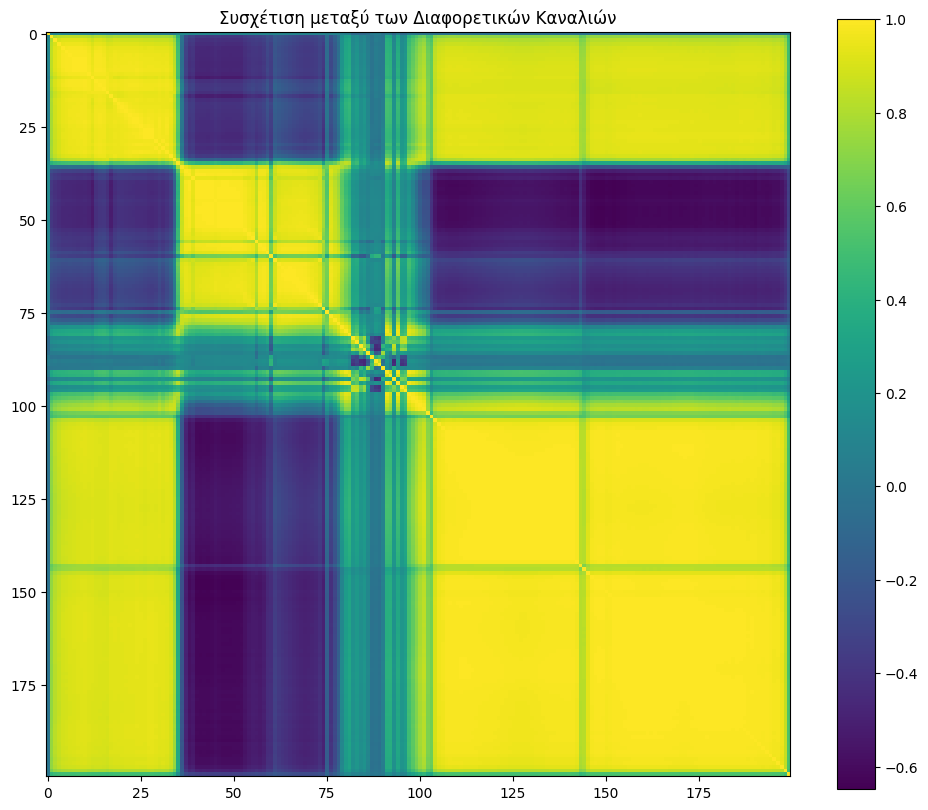

In [181]:
import seaborn as sns

# Υπολογισμός του πίνακα συσχέτισης
correlation_matrix = np.corrcoef(reshaped_image_data.T)

# Δημιουργία του heatmap
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix)
plt.title('Συσχέτιση μεταξύ των Διαφορετικών Καναλιών')
plt.colorbar()
plt.show()

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [182]:
from sklearn.cluster import KMeans

# Ορισμός του αλγορίθμου k-Means με 16 clusters
kmeans = KMeans(n_clusters=16, random_state=42)

# Εφαρμογή του αλγορίθμου στα προεπεξεργασμένα δεδομένα
kmeans.fit(reshaped_image_data)

# Εξαγωγή των ετικετών cluster για κάθε pixel
predicted = kmeans.labels_

c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [183]:
from munkres import Munkres
from sklearn.metrics import accuracy_score, rand_score, silhouette_score

def make_cost_matrix(c1, c2):
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    print(uc1)
    print(uc2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

# Υπολογισμός του accuracy, rand score, και silhouette score
gt = reshaped_labels
translate_predicted_labels(predicted, gt-1)
print("Accuracy: ", accuracy_score(gt, predicted))
print("Rand Score: ", rand_score(gt, predicted))
print("Silhouette Score: ", silhouette_score(reshaped_image_data, predicted))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 14
map: 1 --> 15
map: 2 --> 9
map: 3 --> 4
map: 4 --> 12
map: 5 --> 3
map: 6 --> 7
map: 7 --> 11
map: 8 --> 8
map: 9 --> 5
map: 10 --> 1
map: 11 --> 10
map: 12 --> 6
map: 13 --> 13
map: 14 --> 2
map: 15 --> 0
Accuracy:  0.09561908478875988
Rand Score:  0.8509086090461483
Silhouette Score:  0.2838124536963247


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

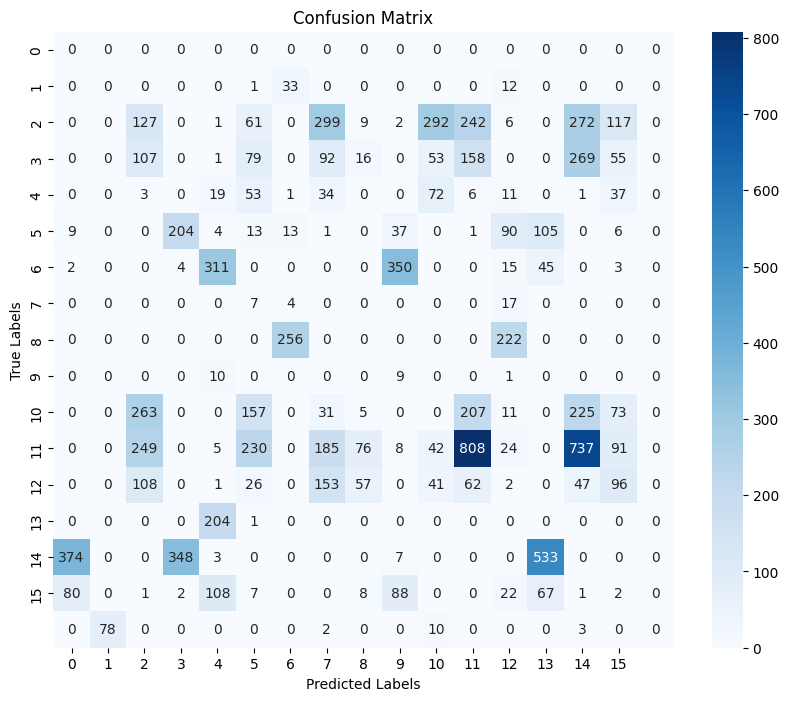

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Υπολογισμός του confusion matrix
cm = confusion_matrix(reshaped_labels, predicted)

# Εμφάνιση του confusion matrix χρησιμοποιώντας seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(predicted), yticklabels=np.unique(predicted))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

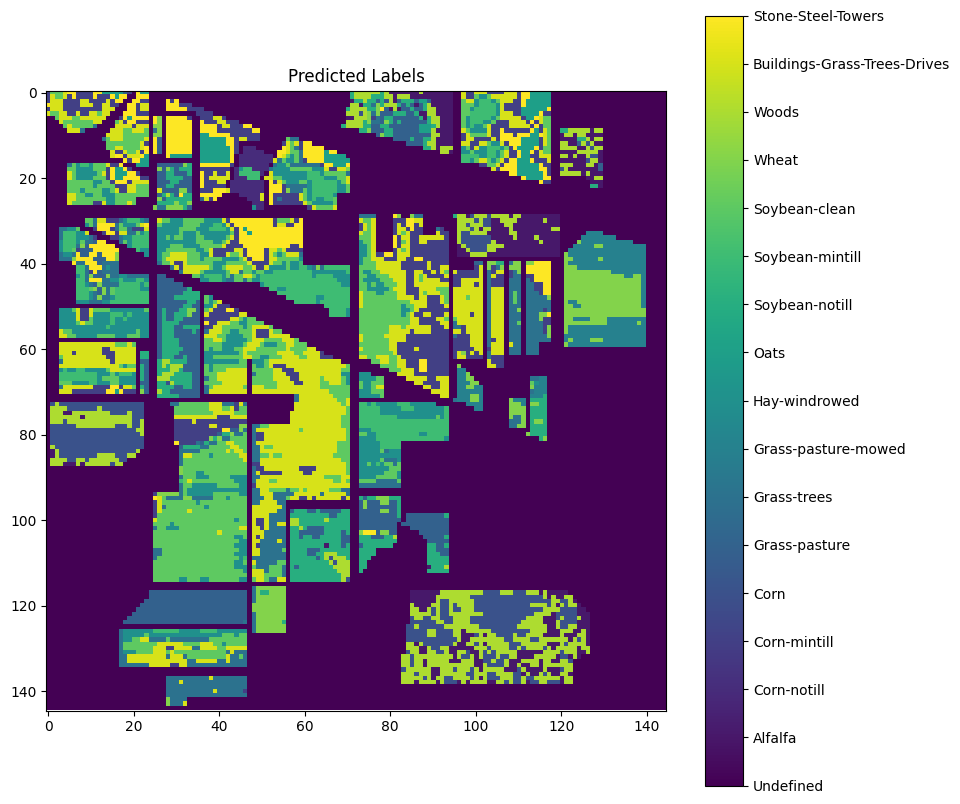

In [185]:
predicted_image = np.zeros((height * width))
predicted_image[defined_indices] = predicted + 1

predicted_image = predicted_image.reshape((height, width))

plt.figure(figsize=(10, 10))
plt.imshow(predicted_image)

cbar = plt.colorbar(ticks=range(len(classes)))
cbar.ax.set_yticklabels(classes)


plt.title('Predicted Labels')
plt.show()


### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [186]:
from sklearn.decomposition import PCA

# Δημιουργία αντικειμένου PCA με n_components=3
pca = PCA(n_components=3)

# Εφαρμογή του PCA στα δεδομένα
pca_result = pca.fit_transform(reshaped_image_data)

# Εμφάνιση των αποτελεσμάτων
print("Διαστάσεις των δεδομένων μετά το PCA:", pca_result.shape)

Διαστάσεις των δεδομένων μετά το PCA: (10249, 3)


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [187]:
# Δημιουργία αντικειμένου PCA με n_components=3
pca = PCA(n_components=3)

# Εφαρμογή του PCA στα δεδομένα
pca_result = pca.fit_transform(reshaped_image_data)

# Ποσοστό διακύμανσης που διατηρείται
variance_ratio = pca.explained_variance_ratio_

# Εμφάνιση των αποτελεσμάτων
print("Ποσοστό διακύμανσης που διατηρείται:", sum(variance_ratio))
print("Ποσοστό διακύμανσης για κάθε principal component:", variance_ratio)

Ποσοστό διακύμανσης που διατηρείται: 0.9420148959771664
Ποσοστό διακύμανσης για κάθε principal component: [0.66452713 0.2654258  0.01206197]


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [188]:
kmeans = KMeans(n_clusters=16)
cluster_labels = kmeans.fit_predict(pca_result)

#calculate accuracy score, rand score and silhouette score
predicted = cluster_labels
gt = reshaped_labels
translate_predicted_labels(predicted, gt-1)
print("Accuracy: ", accuracy_score(gt, predicted))
print("Rand Score: ", rand_score(gt, predicted))
print("Silhouette Score: ", silhouette_score(pca_result, predicted))


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 10
map: 1 --> 4
map: 2 --> 14
map: 3 --> 11
map: 4 --> 2
map: 5 --> 1
map: 6 --> 6
map: 7 --> 13
map: 8 --> 5
map: 9 --> 12
map: 10 --> 8
map: 11 --> 3
map: 12 --> 9
map: 13 --> 15
map: 14 --> 7
map: 15 --> 0
Accuracy:  0.02283149575568348
Rand Score:  0.8512851428013883
Silhouette Score:  0.37173762601197213


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 15
map: 1 --> 3
map: 2 --> 0
map: 3 --> 6
map: 4 --> 12
map: 5 --> 9
map: 6 --> 14
map: 7 --> 2
map: 8 --> 13
map: 9 --> 7
map: 10 --> 11
map: 11 --> 10
map: 12 --> 4
map: 13 --> 5
map: 14 --> 1
map: 15 --> 8


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 10
map: 1 --> 4
map: 2 --> 1
map: 3 --> 6
map: 4 --> 14
map: 5 --> 0
map: 6 --> 9
map: 7 --> 7
map: 8 --> 15
map: 9 --> 12
map: 10 --> 8
map: 11 --> 2
map: 12 --> 5
map: 13 --> 3
map: 14 --> 11
map: 15 --> 13


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 14
map: 1 --> 12
map: 2 --> 13
map: 3 --> 10
map: 4 --> 8
map: 5 --> 15
map: 6 --> 9
map: 7 --> 5
map: 8 --> 6
map: 9 --> 7
map: 10 --> 2
map: 11 --> 1
map: 12 --> 3
map: 13 --> 4
map: 14 --> 0
map: 15 --> 11


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 15
map: 1 --> 4
map: 2 --> 12
map: 3 --> 1
map: 4 --> 3
map: 5 --> 0
map: 6 --> 7
map: 7 --> 6
map: 8 --> 8
map: 9 --> 2
map: 10 --> 11
map: 11 --> 9
map: 12 --> 5
map: 13 --> 10
map: 14 --> 14
map: 15 --> 13


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 6
map: 1 --> 9
map: 2 --> 11
map: 3 --> 3
map: 4 --> 12
map: 5 --> 15
map: 6 --> 14
map: 7 --> 13
map: 8 --> 4
map: 9 --> 10
map: 10 --> 5
map: 11 --> 0
map: 12 --> 1
map: 13 --> 2
map: 14 --> 8
map: 15 --> 7


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 12
map: 1 --> 11
map: 2 --> 1
map: 3 --> 14
map: 4 --> 2
map: 5 --> 9
map: 6 --> 10
map: 7 --> 0
map: 8 --> 7
map: 9 --> 6
map: 10 --> 8
map: 11 --> 3
map: 12 --> 15
map: 13 --> 5
map: 14 --> 4
map: 15 --> 13


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 6
map: 1 --> 8
map: 2 --> 3
map: 3 --> 14
map: 4 --> 7
map: 5 --> 11
map: 6 --> 9
map: 7 --> 12
map: 8 --> 5
map: 9 --> 10
map: 10 --> 4
map: 11 --> 0
map: 12 --> 1
map: 13 --> 15
map: 14 --> 2
map: 15 --> 13


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 14
map: 1 --> 12
map: 2 --> 0
map: 3 --> 13
map: 4 --> 5
map: 5 --> 9
map: 6 --> 8
map: 7 --> 6
map: 8 --> 3
map: 9 --> 7
map: 10 --> 10
map: 11 --> 2
map: 12 --> 15
map: 13 --> 1
map: 14 --> 4
map: 15 --> 11


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 8
map: 1 --> 6
map: 2 --> 7
map: 3 --> 14
map: 4 --> 10
map: 5 --> 12
map: 6 --> 2
map: 7 --> 13
map: 8 --> 3
map: 9 --> 15
map: 10 --> 1
map: 11 --> 9
map: 12 --> 4
map: 13 --> 0
map: 14 --> 5
map: 15 --> 11


c:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 13
map: 1 --> 7
map: 2 --> 15
map: 3 --> 8
map: 4 --> 3
map: 5 --> 9
map: 6 --> 11
map: 7 --> 6
map: 8 --> 2
map: 9 --> 12
map: 10 --> 1
map: 11 --> 4
map: 12 --> 0
map: 13 --> 14
map: 14 --> 5
map: 15 --> 10


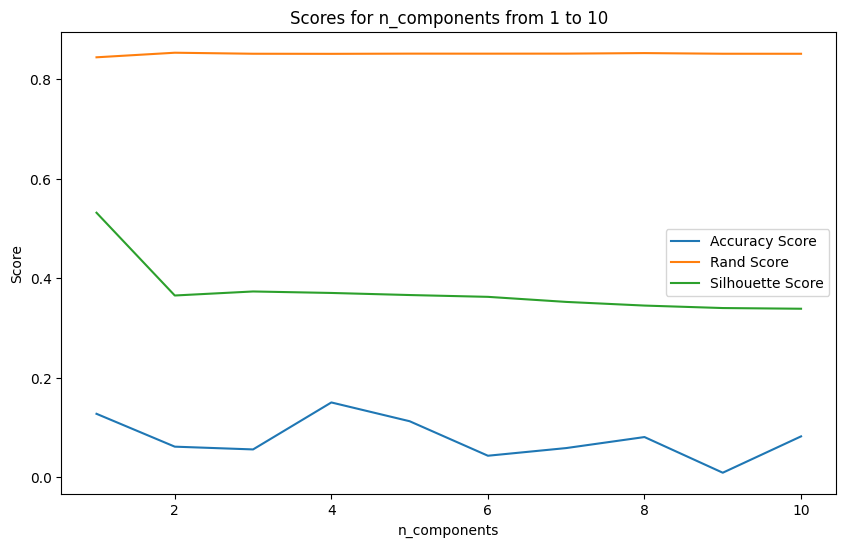

In [189]:
n_components = range(1, 11)
accuracy_scores = []
rand_scores = []
silhouette_scores = []

for n in n_components:
    pca = PCA(n_components=n)
    pca_result = pca.fit_transform(reshaped_image_data)

    kmeans = KMeans(n_clusters=16).fit(pca_result)

    predicted = kmeans.labels_
    gt = reshaped_labels

    translate_predicted_labels(gt-1, predicted)
    accuracy_scores.append(accuracy_score(gt, predicted))
    rand_scores.append(rand_score(gt, predicted))
    silhouette_scores.append(silhouette_score(pca_result, predicted))

#plot scores
plt.figure(figsize=(10, 6))
plt.plot(n_components, accuracy_scores, label='Accuracy Score')
plt.plot(n_components, rand_scores, label='Rand Score')
plt.plot(n_components, silhouette_scores, label='Silhouette Score')
plt.legend()
plt.xlabel('n_components')
plt.ylabel('Score')
plt.title('Scores for n_components from 1 to 10')
plt.show()

#accuracy score σταθερό για μικρές τιμες του n και παρουσιάζει διακύμανση για μεγαλύτερες
#rand score περιπου σταθερό
#silhouette score μεγάλο για μικρές τιμές του n και μετά μειώνεται και σταθεροποιείται